In [12]:
import numpy as np
from hazma.rh_neutrino import RHNeutrino
from hazma.parameters import lepton_masses
import matplotlib.pyplot as plt

In [5]:
model = RHNeutrino(500.0, 1e-3, include_3body=True)
xs = np.geomspace(1e-4, 1.0, 100)
egams = xs * model.mx
spec_e = model.total_spectrum(egams)

model = RHNeutrino(500.0, 1e-3, "mu", include_3body=True)
xs = np.geomspace(1e-4, 1.0, 100)
egams = xs * model.mx
spec_mu = model.total_spectrum(egams)

/home/logan/github/Hazma/hazma/decay.py:159: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.charged_pion_decay_spectrum(
/home/logan/github/Hazma/hazma/decay.py:159: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.charged_pion_decay_spectrum(
/home/logan/github/Hazma/hazma/decay.py:159: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.charged_pion_decay_spectrum(
/home/logan/github/Hazma/hazma/decay.py:159: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.charged_pion_decay_spectrum(
/home/logan/github/Hazma/hazma/decay.py:159: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.charged_pion_decay_spectrum(
/home/logan/github/Hazma/hazma/decay.py:159: IntegrationWarning: The integral is probably divergent,

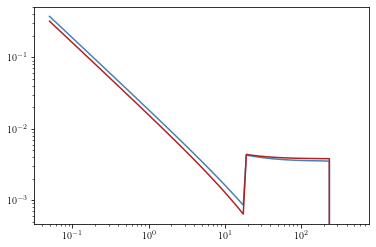

In [7]:
plt.plot(egams, spec_e)
plt.plot(egams, spec_mu)
plt.yscale('log')
plt.xscale('log')

In [7]:
model = RHNeutrino(500.0, 1e-3, "mu", include_3body=True)

In [20]:
model = RHNeutrino(500.0, 1e-3, "mu", include_3body=True)
mxs = np.geomspace(0.1, 500.0, 1000)
ws = {fs: np.zeros_like(mxs) for fs in model.decay_branching_fractions().keys()}

for i, mx in enumerate(mxs):
    model.mx = mx
    for key, val in model.decay_branching_fractions().items():
        ws[key][i] = val

In [22]:
import h5py

In [23]:
f = h5py.File("../results/rhn_mu.hdf5", "r")

In [37]:
data = 1 / f['gecco/gc_nfw_5_deg/limits'][0,:]
data_mxs =f['masses'][:]

data = data / np.max(data)

In [40]:
data

array([0.00000000e+000, 3.04109553e-249, 1.49727208e-169, 1.12316376e-109,
       4.92890993e-066, 1.19378294e-035, 4.76924699e-016, 3.73764697e-005,
       4.52275289e-001, 1.00000000e+000, 9.24803793e-001, 7.97363532e-001,
       8.82366134e-001, 7.78558306e-001, 8.30269620e-001, 7.81942927e-001,
       5.38713720e-001, 7.46308800e-001, 6.96741458e-001, 5.99869066e-001,
       6.67176827e-001, 6.17007052e-001, 6.36640160e-001, 6.00722210e-001,
       4.35892714e-001, 5.77434087e-001, 5.45383296e-001, 5.01511641e-001,
       5.26283103e-001, 4.99219238e-001, 5.11086316e-001, 4.75214215e-001,
       4.28177317e-001, 4.48266199e-001, 4.16141627e-001, 4.11467230e-001,
       3.86712356e-001, 3.49514347e-001, 3.57796446e-001, 3.23115825e-001,
       2.96298136e-001, 2.98867969e-001, 2.74784805e-001, 2.67583805e-001,
       2.49325885e-001, 2.30311596e-001, 2.23996721e-001, 2.15641669e-001,
       2.22931945e-001, 2.26811907e-001, 2.30845134e-001, 2.32244190e-001,
       2.32917167e-001, 2

(0.0001, 1)

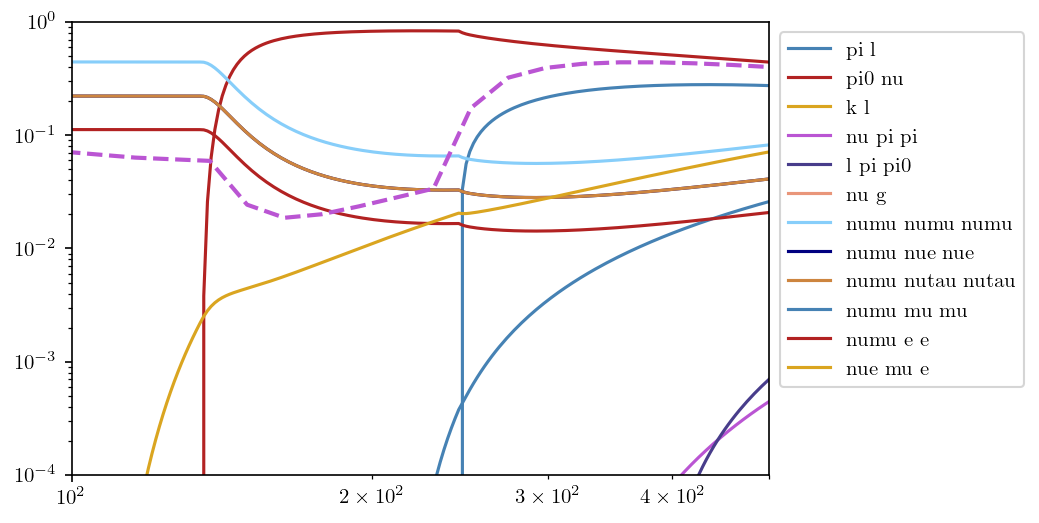

In [41]:
plt.figure(dpi=150)
for key, val in ws.items():
    plt.plot(mxs, val, label=key)
plt.plot(data_mxs, data, lw=2, ls='--')
plt.yscale('log')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xlim([100, 500])
plt.ylim([1e-4,1])

# Constrain Plots

This notebook contains code used to make constraint plots.

In [119]:
import h5py
import numpy as np
import sys
import warnings
sys.path.append("..")

# from matplotlib.lines import Line2D
# from matplotlib.patches import Patch
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_conf import LABEL_DICT as label_dict



from hazma.rh_neutrino import RHNeutrino

from scripts.mpl_conf import COLOR_DICT as color_dict
from scripts.mpl_conf import SIGV_TEX, SIGV_UNITS, MEV_UNITS
from scripts import mpl_conf

ModuleNotFoundError: No module named 'mpl_conf'

In [8]:
fe = h5py.File("../results/rhn_e.hdf5", "r")
fm = h5py.File("../results/rhn_mu.hdf5", "r")

In [83]:
masses = DATAFILE_E['masses']
thetas = np.geomspace(1e-20, 1e-6, 100)
rhn = RHNeutrino(1, 1e-3, 'e')
taus = np.zeros((len(masses), len(thetas)))
for i, mx in enumerate(masses):
    for j, theta in enumerate(thetas):
        rhn.mx = mx
        rhn.theta = theta
        taus[i, j] = 1 / (rhn.decay_widths()["total"] * 1.51927e21)

In [144]:
f = h5py.File("../results/single_channel_dec.hdf5", "r")

In [148]:
f['e e'].keys()

<KeysViewHDF5 ['comptel', 'egret', 'fermi', 'gecco', 'integral']>

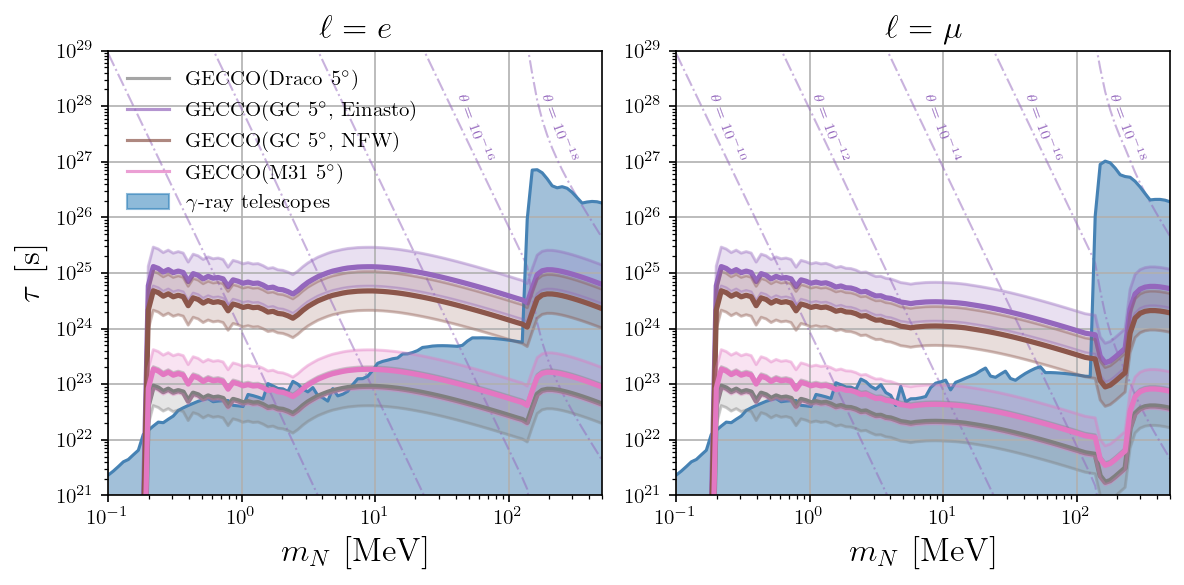

In [139]:
DATAFILE_E = h5py.File("../results/rhn_e.hdf5", "r")
DATAFILE_M = h5py.File("../results/rhn_mu.hdf5", "r")

YLABEL = r"$\tau \ [\mathrm{s}]$"
XLABEL = r"$m_{N}$" + r"$ \ $" + MEV_UNITS


def add_gecco(axis, masses, gecco):
    for key in gecco.keys():
        conf = {"color": color_dict[key]}
        c1 = 1 / gecco[key]["limits"][0, :]
        c2 = 1 / gecco[key]["limits"][1, :]
        avg = np.exp(np.log(c1 * c2) / 2.0)
        axis.fill_between(masses, c1, c2, lw=1, alpha=0.2, **conf)
        axis.plot(masses, avg, lw=2.5, **conf)
        axis.plot(masses, c1, lw=1.5, alpha=0.3, ls="-", **conf)
        axis.plot(masses, c2, lw=1.5, alpha=0.3, ls="-", **conf)


def existing_outline(datafile):
    egret = 1 / datafile["egret"][:]
    comptel = 1 / datafile["comptel"][:]
    fermi = 1 / datafile["fermi"][:]
    integral = 1 / datafile["integral"][:]
    return np.array(
        [np.max([e, c, f, i]) for e, c, f, i in zip(egret, comptel, fermi, integral)]
    )


def add_existing(axis, masses, ylims, datafile):
    existing = existing_outline(datafile)
    existing = np.clip(existing, np.min(ylims), np.max(ylims))
    axis.fill_between(masses, existing, 0.0, alpha=0.5)
    axis.plot(masses, existing)


def add_theta_contour(axis, datafile, theta, lepton):
    masses = datafile["masses"][:]
    rhn = RHNeutrino(1, theta, lepton)
    taus = np.zeros_like(masses)
    for i, m in enumerate(masses):
        rhn.mx = m
        taus[i] = 1 / (rhn.decay_widths()["total"] * 1.51927e21)
    axis.plot(masses, taus, ls="-.", color=mpl_conf.PURPLE, alpha=0.5, lw=1)


def add_theta_label(axis, x, y, p):
    axis.text(
        x,
        y,
        r"$\theta=10^{" + str(p) + r"}$",
        fontsize=7,
        rotation=-70,
        color=mpl_conf.PURPLE,
    )


def add_plot(axis, datafile, ylims):
    masses = datafile["masses"][:]
    gecco = datafile["gecco"]

    add_existing(axis, masses, ylims, datafile)
    add_gecco(axis, masses, gecco)

    axis.set_yscale("log")
    axis.set_xscale("log")
    axis.set_ylim(ylims)
    axis.set_xlim(np.min(masses), np.max(masses))
    
    
def add_gecco_legend(axis, geccos):
    label_dict = mpl_conf.LABEL_DICT
    handels = []
    for key in geccos.keys():
        handels += [
            Line2D([0],[0],color=color_dict[key], label="GECCO" + label_dict[key], alpha=0.7)
        ]
    handels += [
        Patch(color=color_dict['existing'], label=r"$\gamma$-ray telescopes", alpha=0.5)
    ]
    axis.legend(handles=handels, loc=2, fontsize=10, frameon=False)



fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(8, 4))
ylims = (1e21, 1e29)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    add_gecco_legend(ax1, DATAFILE_E["gecco"])

    text_xs = [170, 40, 7, 1, 0.17]
    text_ys = [1e27, 1e27, 1e27, 1e27, 1e27]
    pows = [-18, -16, -14, -12, -10]

    for x, y, p in zip(text_xs, text_ys, pows):
        add_theta_contour(ax1, DATAFILE_E, 10 ** p, "e")
        if p < -15:
            add_theta_label(ax1, x, y, p)
        add_theta_contour(ax2, DATAFILE_M, 10 ** p, "mu")
        add_theta_label(ax2, x, y, p)

    add_plot(ax1, DATAFILE_E, ylims)
    add_plot(ax2, DATAFILE_M, ylims)




ax1.set_ylabel(YLABEL, fontdict={"size": 16})
ax1.set_xlabel(XLABEL, fontdict={"size": 16})
ax1.set_title(r"$\ell=e$", fontdict={"size": 16})
ax1.grid(True, axis='y', which='major')
ax1.grid(True, axis='x', which='major')
ax1.set_yticks([10.0**x for x in range(21,30)])
#ax1.yaxis.set_minor_locator(MultipleLocator(5))



ax2.set_xlabel(XLABEL, fontdict={"size": 16})
ax2.set_title(r"$\ell=\mu$", fontdict={"size": 16})
ax2.grid(True, axis='y', which='major')
ax2.grid(True, axis='x', which='major')


plt.tight_layout()
plt.savefig("rhn.pdf")


## Setup and utils

In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import sys

sys.path.append("..")

import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from gecko import config as mpl_conf
from hazma.cmb import vx_cmb
from hazma.parameters import muon_mass as mmu

color_dict = mpl_conf.COLOR_DICT
linestyles = mpl_conf.MPL_LINESTYLES
existings = mpl_conf.EXISTINGS
gecco_anns = mpl_conf.GECCO_ANNS
gecco_decs = mpl_conf.GECCO_DECS
label_dict = mpl_conf.LABEL_DICT

In [24]:
fig = plt.figure(dpi=150)

<Figure size 900x600 with 0 Axes>

## Annihilation

In [39]:
ANN_DATA_FILE = "../results/single_channel_ann.hdf5"
datafile_ann = h5py.File(ANN_DATA_FILE, "r")

In [40]:
datafile_ann.keys()

<KeysViewHDF5 ['e e', 'g g', 'mu mu', 'pi pi']>

NameError: name 'geccos' is not defined

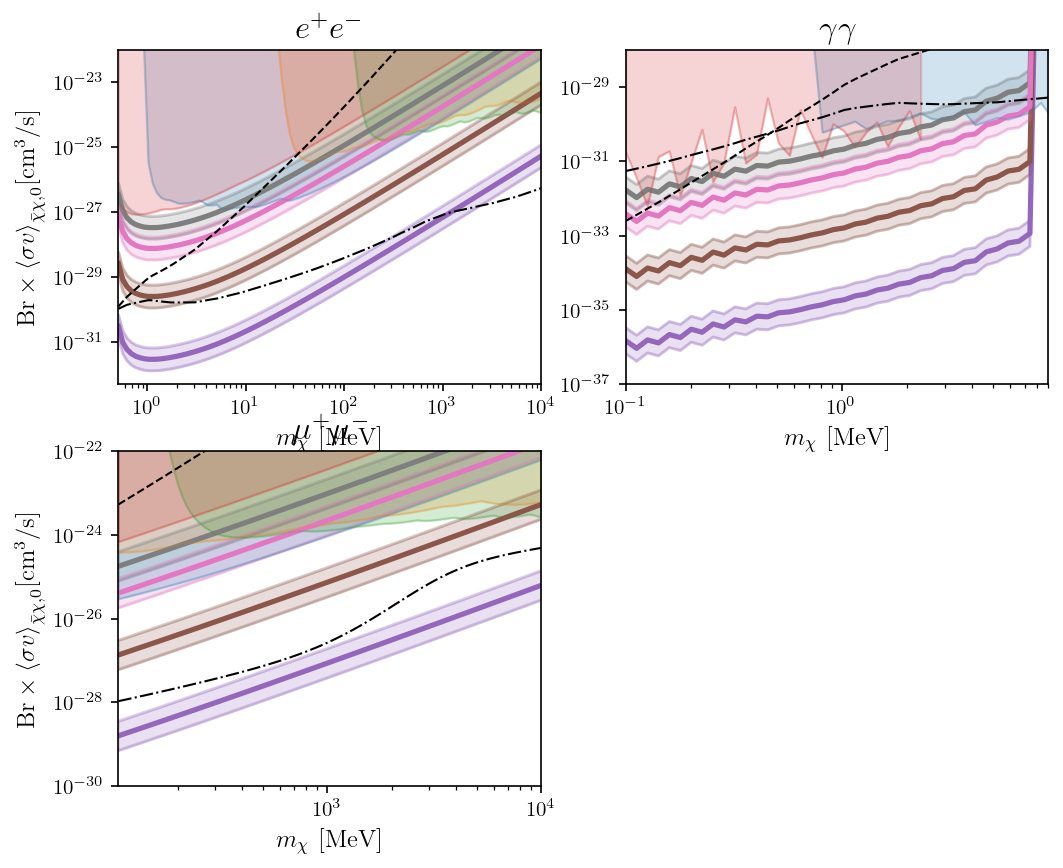

In [3]:
ANN_DATA_FILE = "../results/single_channel_ann.hdf5"
datafile_ann = h5py.File(ANN_DATA_FILE, "r")


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6.5))
fig.dpi = 150
axes_idxs = [(0, 0), (0, 1), (1, 0)]
last_axis = axes[1][1]
ylabel = r"$\mathrm{Br}\times{\langle\sigma v\rangle}_{\bar{\chi}\chi,0} [\mathrm{cm}^3/\mathrm{s}]$"
xlabel = r"$m_{\chi} \ [\mathrm{MeV}]$"

ylims = [[5e-33, 1e-22], [1e-37, 1e-28], [1e-30, 1e-22]]
xmaxs = [1e4, 9, 1e4]
titles = [r"$e^{+}e^{-}$", r"$\gamma\gamma$", r"$\mu^{+}\mu^{-}$"]


for i, (channel, idx) in enumerate(zip(datafile_ann.keys(), axes_idxs)):
    axis = axes[idx[0]][idx[1]]
    group = datafile_ann[channel]
    masses = group["masses"][:]
    cmb = group["cmb"][:]
    vratios = np.array([(1e-3 / vx_cmb(mx, 1e-4)) ** 2 for mx in masses])
    cmb_s_wave = cmb
    cmb_p_wave = vratios * cmb

    gecco5 = group["gecco-5sigma"]
    gecco25 = group["gecco-25sigma"]
    for obs in gecco5.keys():
        conf = {"color": color_dict[obs]}
        high = gecco5[obs][:]
        low = gecco25[obs][:]
        avg = np.exp(np.log(high * low) / 2.0)
        axis.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
        axis.plot(masses, avg, lw=2.5, **conf)
        axis.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
        axis.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)

    for tel in ["comptel", "egret", "fermi", "integral"]:
        conf = {"color": color_dict[tel], "alpha": 0.2, "lw": 1.0}
        data = group[tel][:]
        axis.fill_between(masses, data, 1e-20, where=data < 1e-20, **conf)
        axis.plot(masses, data, **conf)

    axis.plot(masses[cmb < 1e-20], vratios * cmb[cmb < 1e-20], lw=1, ls="--", c="k")
    axis.plot(masses[cmb < 1e-20], cmb[cmb < 1e-20], lw=1, ls="-.", c="k")

    if idx[1] == 0:
        axis.set_ylabel(ylabel, fontsize=12)
    axis.set_xlabel(xlabel, fontsize=12)
    axis.set_yscale("log")
    axis.set_xscale("log")
    axis.set_ylim(ylims[i])
    axis.set_xlim(np.min(masses), xmaxs[i])
    axis.set_title(titles[i], fontsize=16)
    # plt.legend(bbox_to_anchor=(1.0,1.0))

last_axis.clear()
last_axis.set_axis_off()

handels = []
# handels += [mpl.lines.Line2D([0],[0],color='k', label=r"$\mathrm{SNR}=5$",lw=1.5, ls=linestyles['dashed'])]
# handels += [mpl.lines.Line2D([0],[0],color='k', label=r"$\mathrm{SNR}=25$",lw=1.5, ls=linestyles['dotted'])]
for key in geccos:
    handels += [
        mpl.patches.Patch(
            color=color_dict[key], label="GECCO" + label_dict[key], alpha=0.7
        )
    ]
handels += [
    mpl.lines.Line2D([0], [0], color="k", label=label_dict["cmb_p_wave"], ls="--", lw=1)
]
handels += [
    mpl.lines.Line2D([0], [0], color="k", label=label_dict["cmb_s_wave"], ls="-.", lw=1)
]
for key in existings:
    handels += [
        mpl.patches.Patch(color=color_dict[key], label=label_dict[key], alpha=0.3)
    ]
last_axis.legend(handles=handels, loc="center", fontsize=12)

plt.tight_layout()
# plt.savefig('figures/single_channel_ann_banded.pdf')

datafile_ann.close()

## Decay

<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)


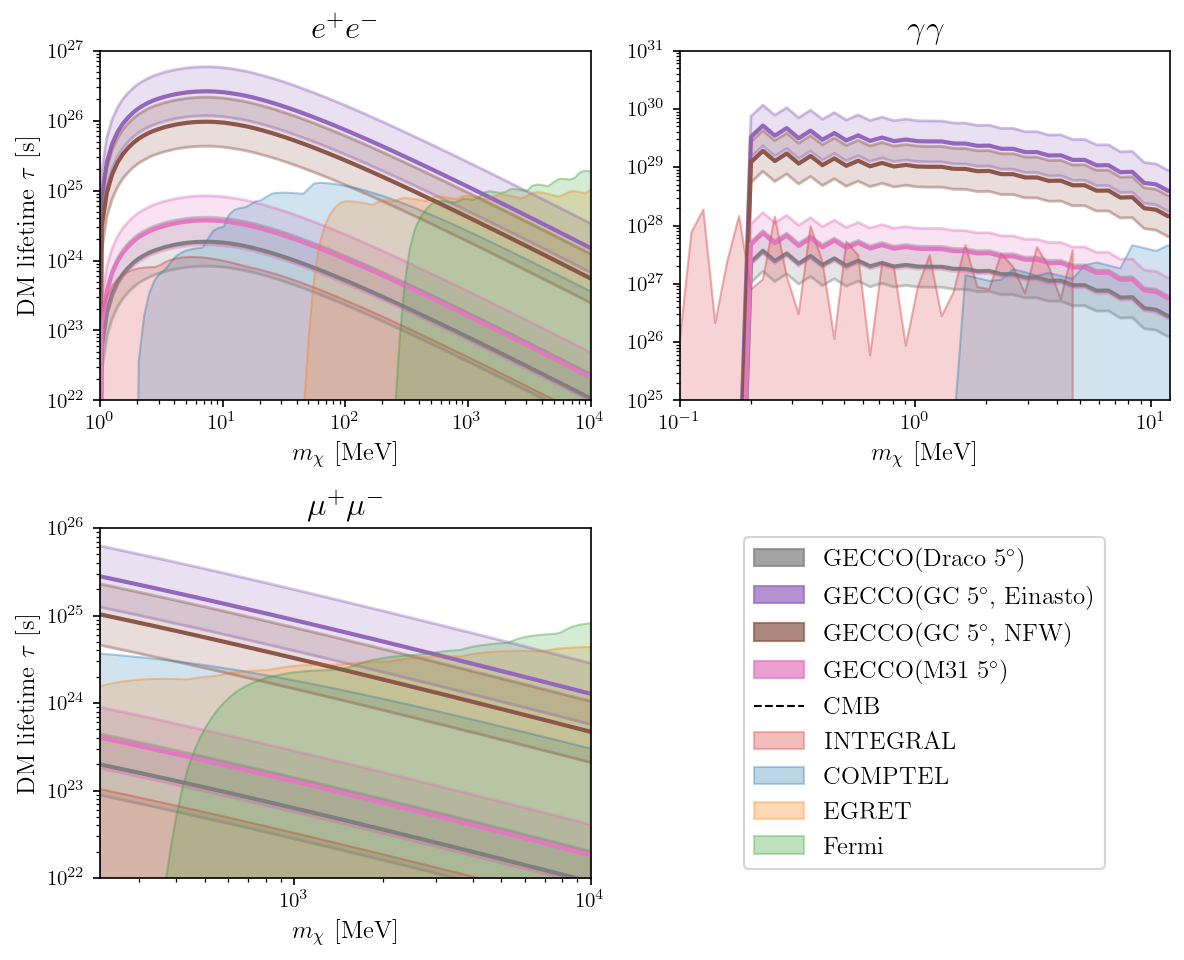

In [30]:
DEC_DATA_FILE = "../results/single_channel_dec.hdf5"
datafile_dec = h5py.File(DEC_DATA_FILE, "r")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6.5))
fig.dpi = 150
axes_idxs = [(0, 0), (0, 1), (1, 0)]
last_axis = axes[1][1]
ylabel = r"$\mathrm{DM} \ \mathrm{lifetime} \ \tau \ [\mathrm{s}]$"
xlabel = r"$m_{\chi} \ [\mathrm{MeV}]$"

ylims = [[1e22, 1e27], [1e25, 1e31], [1e22, 1e26]]
xmins = [1, 0.1, mmu * 2 + 10]
xmaxs = [1e4, 12, 1e4]
titles = [r"$e^{+}e^{-}$", r"$\gamma\gamma$", r"$\mu^{+}\mu^{-}$"]

for i, (channel, idx) in enumerate(zip(datafile_dec.keys(), axes_idxs)):
    axis = axes[idx[0]][idx[1]]
    group = datafile_dec[channel]
    masses = group["masses"][:]
    cmb = group["cmb"][:]
    vratios = np.array([(1e-3 / vx_cmb(mx, 1e-4)) ** 2 for mx in masses])
    cmb_s_wave = 1 / cmb
    cmb_p_wave = 1 / (vratios * cmb)

    gecco5 = group["gecco-5sigma"]
    gecco25 = group["gecco-25sigma"]
    for obs in gecco5.keys():
        conf = {"color": color_dict[obs]}
        low = 1 / gecco25[obs][:]
        high = 1 / gecco5[obs][:]
        avg = np.exp(np.log(high * low) / 2.0)
        axis.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
        axis.plot(masses, avg, lw=2.0, **conf)
        axis.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
        axis.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)

    for tel in existings:
        conf = {"color": color_dict[tel], "alpha": 0.2, "lw": 1.0}
        data = 1 / group[tel][:]
        axis.fill_between(masses, data, 0.0, where=data > 1e20, **conf)
        axis.plot(masses, data, **conf)

    if idx[1] == 0:
        axis.set_ylabel(ylabel, fontsize=12)
    axis.set_xlabel(xlabel, fontsize=12)
    axis.set_yscale("log")
    axis.set_xscale("log")
    axis.set_ylim(ylims[i])
    axis.set_xlim(xmins[i], xmaxs[i])
    axis.set_title(titles[i], fontsize=16)
    # plt.legend(bbox_to_anchor=(1.0,1.0))

# cmb_epem = np.genfromtxt("gecko/data/cmb_epem.csv", delimiter=",")
# axes[0,0].plot(1e3 * cmb_epem.T[0], cmb_epem.T[1], c='k', ls='--', lw=1)

last_axis.clear()
last_axis.set_axis_off()

handels = []

# handels += [mpl.lines.Line2D([0],[0],color='k', label=r"$\mathrm{SNR}=5$",lw=1.5, ls=linestyles['dashed'])]
# handels += [mpl.lines.Line2D([0],[0],color='k', label=r"$\mathrm{SNR}=25$",lw=1.5, ls=linestyles['dotted'])]

for key in geccos:
    handels += [
        mpl.patches.Patch(
            color=color_dict[key], label="GECCO" + label_dict[key], alpha=0.7
        )
    ]
handels += [
    mpl.lines.Line2D([0], [0], color="k", label=r"$\mathrm{CMB}$", ls="--", lw=1)
]
for key in existings:
    handels += [
        mpl.patches.Patch(color=color_dict[key], label=label_dict[key], alpha=0.3)
    ]
last_axis.legend(handles=handels, loc="center", fontsize=12)

plt.tight_layout()
# plt.savefig('figures/single_channel_dec_banded.pdf')
datafile_dec.close()

## Higgs-Portal

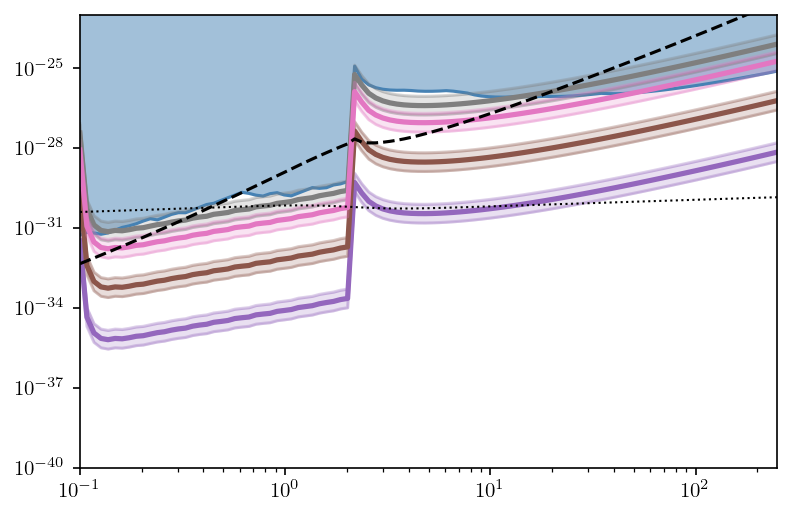

In [78]:
datafile = h5py.File("../results/higgs_portal_0_5.hdf5", "r")


plt.figure(dpi=150)

ymax = 1e-23
ymin = 1e-40

masses = datafile["masses"][:]
gecco5 = datafile["gecco-5sigma"]
gecco25 = datafile["gecco-25sigma"]

egret = datafile["egret"][:]
comptel = datafile["comptel"][:]
fermi = datafile["fermi"][:]
integral = datafile["integral"][:]
cmb = datafile["cmb"][:]
rd = datafile["relic-density"][:]

vratios = np.array([(1e-3 / vx_cmb(mx, 1e-4)) ** 2 for mx in masses])
cmb_s_wave = cmb
cmb_p_wave = vratios * cmb

existing = np.array(
    [np.min([e, c, f, i]) for e, c, f, i in zip(egret, comptel, fermi, integral)]
)
existing = np.clip(existing, ymin, ymax)
plt.fill_between(masses, existing, ymax, alpha=0.5)
plt.plot(masses, existing)


for obs in gecco5.keys():
    conf = {"color": color_dict[obs]}
    high = gecco5[obs][:]
    low = gecco25[obs][:]
    avg = np.exp(np.log(high * low) / 2.0)
    plt.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
    plt.plot(masses, avg, lw=2.5, **conf)
    plt.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
    plt.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)

plt.plot(masses, cmb_p_wave, ls="--", c="k")
plt.plot(masses, rd, ls="dotted", c="k", lw=1)

plt.yscale("log")
plt.xscale("log")
plt.ylim([ymin, ymax])
plt.xlim(np.min(masses), np.max(masses))

datafile.close()

(0.1, 250.0)

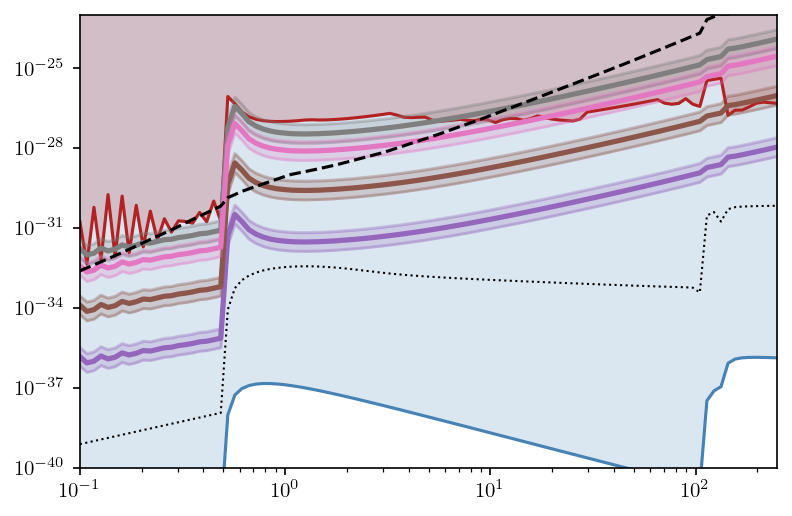

In [80]:
datafile = h5py.File("../results/higgs_portal_1_5.hdf5", "r")

plt.figure(dpi=150)

ymax = 1e-23
ymin = 1e-40

masses = datafile["masses"][:]
gecco5 = datafile["gecco-5sigma"]
gecco25 = datafile["gecco-25sigma"]

egret = datafile["egret"][:]
comptel = datafile["comptel"][:]
fermi = datafile["fermi"][:]
integral = datafile["integral"][:]
cmb = datafile["cmb"][:]
pheno = datafile["pheno"][:]
rd = datafile["relic-density"][:]

vratios = np.array([(1e-3 / vx_cmb(mx, 1e-4)) ** 2 for mx in masses])
cmb_s_wave = cmb
cmb_p_wave = vratios * cmb

plt.fill_between(masses, pheno, ymax, alpha=0.2)
plt.plot(masses, pheno)

existing = np.array(
    [np.min([e, c, f, i]) for e, c, f, i in zip(egret, comptel, fermi, integral)]
)
existing = np.clip(existing, ymin, ymax)
plt.fill_between(masses, existing, ymax, alpha=0.2)
plt.plot(masses, existing)


for obs in gecco5.keys():
    conf = {"color": color_dict[obs]}
    high = gecco5[obs][:]
    low = gecco25[obs][:]
    avg = np.exp(np.log(high * low) / 2.0)
    plt.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
    plt.plot(masses, avg, lw=2.5, **conf)
    plt.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
    plt.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)


plt.plot(masses, cmb_p_wave, ls="--", c="k")
plt.plot(masses, rd, ls="dotted", c="k", lw=1)

plt.yscale("log")
plt.xscale("log")
plt.ylim([ymin, ymax])
plt.xlim(np.min(masses), np.max(masses))

# datafile.close()

## Kinetic Mixing

In [3]:
from hazma.parameters import electron_mass as me

<ipython-input-17-40975a476a8d>:35: RuntimeWarning: overflow encountered in multiply
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-17-40975a476a8d>:35: RuntimeWarning: overflow encountered in multiply
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-17-40975a476a8d>:35: RuntimeWarning: overflow encountered in multiply
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-17-40975a476a8d>:35: RuntimeWarning: overflow encountered in multiply
  avg = np.exp(np.log(high*low)/2.0)


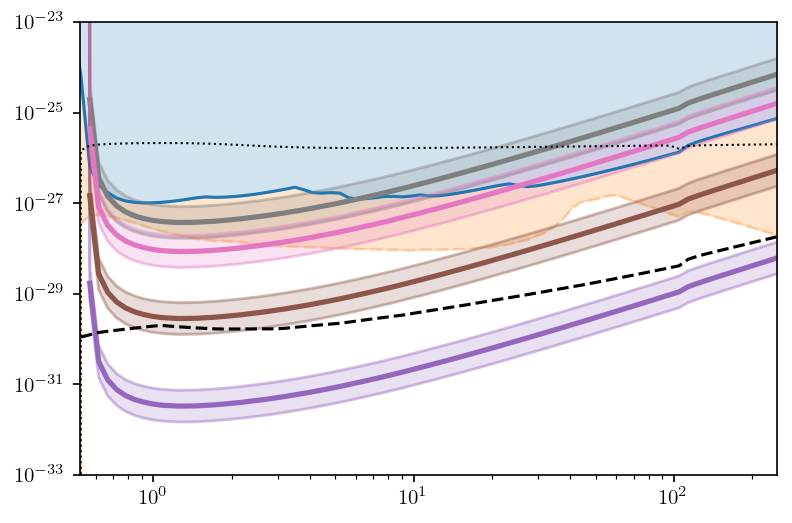

In [17]:
datafile = h5py.File("../results/kinetic_mixing.hdf5", "r")


plt.figure(dpi=150)

ymax = 1e-23
ymin = 1e-33

masses = datafile["masses"][:]
gecco5 = datafile["gecco-5sigma"]
gecco25 = datafile["gecco-25sigma"]

egret = datafile["egret"][:]
comptel = datafile["comptel"][:]
fermi = datafile["fermi"][:]
integral = datafile["integral"][:]
cmb = datafile["cmb"][:]
pheno = datafile["pheno"][:]
rd = datafile["relic-density"][:]


existing = np.array(
    [np.min([e, c, f, i]) for e, c, f, i in zip(egret, comptel, fermi, integral)]
)
existing = np.clip(existing, ymin, ymax)
plt.fill_between(masses, existing, ymax, alpha=0.2, color=mpl_conf.BLUE)
plt.plot(masses, existing, color=mpl_conf.BLUE)

plt.fill_between(masses, pheno, existing, alpha=0.2, color=mpl_conf.ORANGE)
plt.plot(masses, pheno, alpha=0.2, ls="--", color=mpl_conf.ORANGE)


for obs in gecco5.keys():
    conf = {"color": color_dict[obs]}
    high = gecco5[obs][:]
    low = gecco25[obs][:]
    avg = np.exp(np.log(high * low) / 2.0)
    plt.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
    plt.plot(masses, avg, lw=2.5, **conf)
    plt.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
    plt.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)

plt.plot(masses, cmb, ls="--", c="k")
plt.plot(masses, rd, ls="dotted", c="k", lw=1)

plt.yscale("log")
plt.xscale("log")
plt.ylim([ymin, ymax])
plt.xlim(me * 1.02, np.max(masses))

datafile.close()